Accuracy: 100.00%


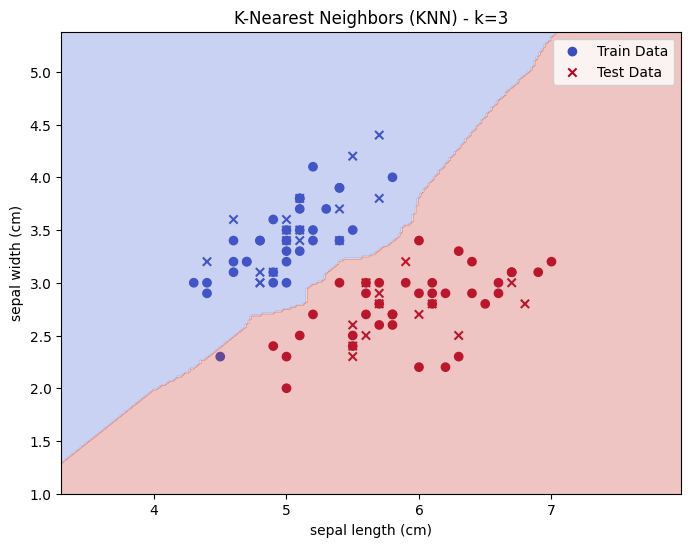

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset (e.g., Iris dataset)
data = datasets.load_iris()
X = data.data[:, :2]  # Use only two features for visualization (e.g., sepal length and sepal width)
y = data.target

# Filter out classes to make it a binary classification task (e.g., class 0 vs class 1)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN model
k = 3  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualizing the decision boundary
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label="Test Data")

# Plot the decision boundary
h = .02  # Step size in the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Labels and title
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f"K-Nearest Neighbors (KNN) - k={k}")
plt.legend()
plt.show()
